<a href="https://colab.research.google.com/github/Sergio-Alan/AI-2025/blob/main/Artificial_Neuron_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load Libraries and Data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten


In [7]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print("Training Set Size", train_data.shape)
print("Test Set Size", test_data.shape)

Training Set Size (60000, 28, 28)
Test Set Size (10000, 28, 28)


## **Data Preprocessing**


In [8]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

In [12]:
num_classes = 10
train_labels_one_hot = to_categorical(train_labels, num_classes=num_classes)
test_labels_one_hot = to_categorical(test_labels, num_classes=num_classes)

print("Training Data shape after normalization:", train_data.shape)
print("Training Data Shape after One Hot:", train_labels_one_hot.shape)

Training Data shape after normalization: (60000, 28, 28)
Training Data Shape after One Hot: (60000, 10)


## **Model Selection and Training**

In [14]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(train_data, train_labels_one_hot,
                    epochs=10, batch_size=32,
                    validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8644 - loss: 0.4619 - val_accuracy: 0.9602 - val_loss: 0.1358
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9650 - loss: 0.1161 - val_accuracy: 0.9640 - val_loss: 0.1147
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9769 - loss: 0.0744 - val_accuracy: 0.9707 - val_loss: 0.1033
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9824 - loss: 0.0557 - val_accuracy: 0.9704 - val_loss: 0.1000
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9723 - val_loss: 0.0950
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9893 - loss: 0.0336 - val_accuracy: 0.9733 - val_loss: 0.1041
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9906 - loss: 0.0282 - val_accuracy: 0.9732 - val_loss: 0.1011
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9928 - loss: 0.0223 - 

In [23]:
loss, accuracy = model.evaluate(test_data, test_labels_one_hot)
print(f"Test precision: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0993
Test precision: 0.9775000214576721


## **Model Testing**

In [22]:
predictions = model.predict(test_data)
predclasses = np.argmax(predictions, axis=1)

print("Predictions:", predclasses[:5])
print("Real labels:", test_labels[:5])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions: [7 2 1 0 4]
Real labels: [7 2 1 0 4]


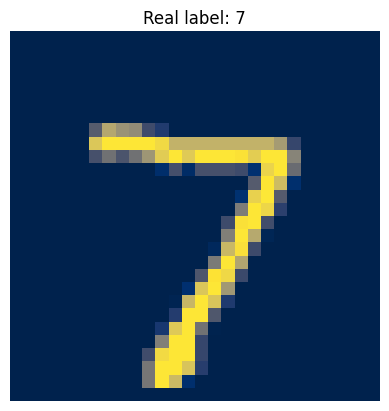

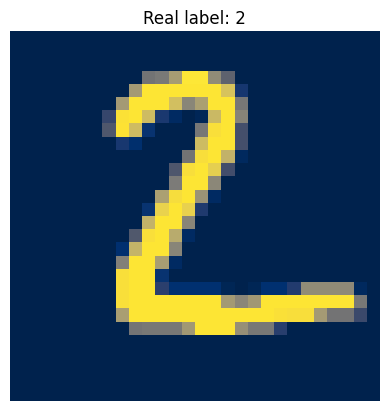

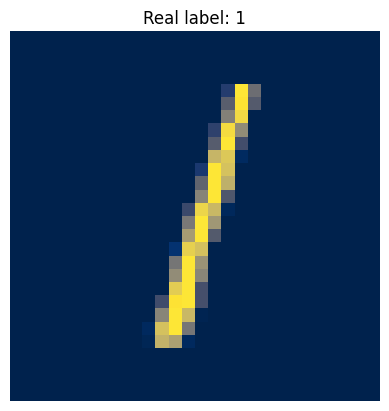

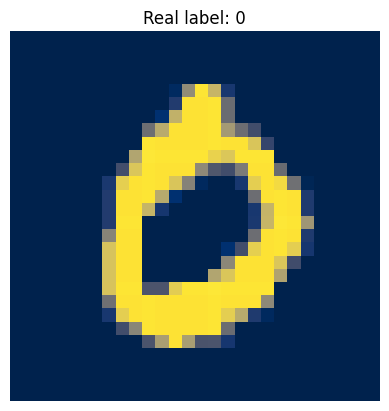

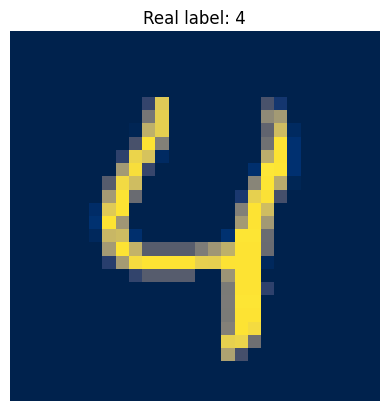

In [21]:
i = 0

for i in range(5):
  plt.imshow(test_data[i].reshape(28,28), cmap='cividis')
  plt.title(f"Real label: {test_labels[i]}")
  plt.axis('off')
  plt.show()